# Linear Regression in Practice

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

**Note**: the exercises are inline in this notebook and *not* at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!

### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we *play* with the data first in order to get a better understanding of it.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing

ds = fetch_california_housing()

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?

In [31]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [32]:
print(f'Target names: {ds["target_names"]}')
print(f'Target values: {ds["target"]}')
print(f'Feature names: {ds["feature_names"]}')
print(f'Shape: {ds["data"].shape}')

Target names: ['MedHouseVal']
Target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape: (20640, 8)


Abbiamo a disposizione 20.640 campioni, 8 caratteristiche (*'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'*) e la variabile target *'MedHouseVal'*

### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [33]:
df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
targets = pd.Series(ds['target'], name='Target')

### Exercise 1c: Examining the Data

Study the *descriptive statistics* of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.

In [34]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Vediamo che in alcune colonne ci sono delle variazioni anomale. In particolare possiamo notare come la caratteristica *AveRooms* abbia una media di 5.42, un min di 0.84 e un max di 141.90, troppo lontano dalla media. Lo stesso vale per *AveBedrms*, *Population* e *AveOccup*. Questo può essere causato dalla presenza di ouliers nei dati e potrebbe influenzare negativamente l'addestramento del modello. Inoltre abbiamo che le variabili indipendenti non sono scalate in modo simile.

---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Exercise 2a: Visualizing the Target
Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to *histograms*, try out the Seaborn function `distplot`.

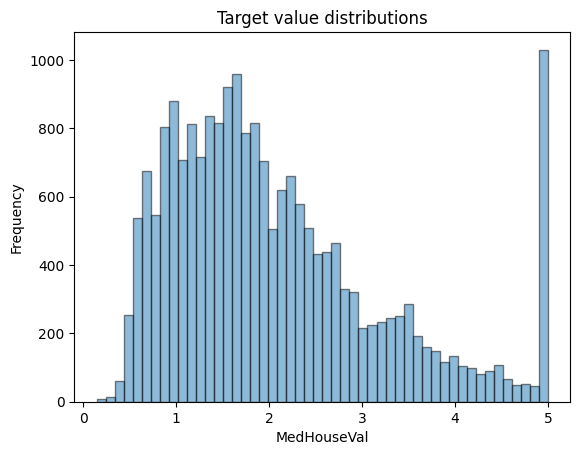

In [35]:
# Matplotlib
plt.hist(targets, bins=50, edgecolor='k', alpha=0.5)
plt.title('Target value distributions')
plt.xlabel('MedHouseVal')
plt.ylabel('Frequency')
plt.show()

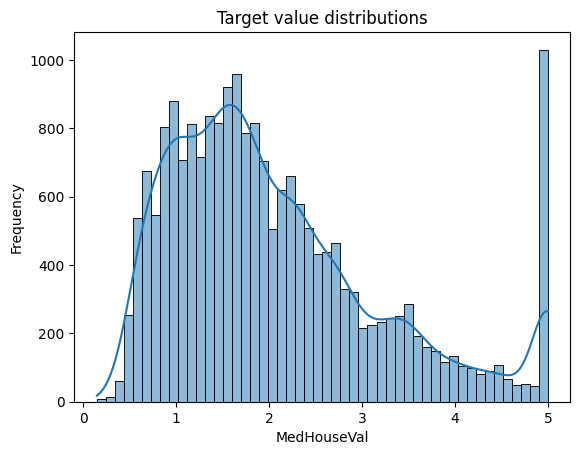

In [36]:
# Seaborn
sns.histplot(targets, bins=50, kde=True)
plt.title('Target value distributions')
plt.xlabel('MedHouseVal')
plt.ylabel('Frequency')
plt.show()

Notiamo immediatamente un picco alla destra del grafico (MedHouseVal=5) causato probabilmente dalla presenza di outliers. Se non si considera questa parte, vediamo inoltre che i target hanno in media un valore che va da 1 a 2.

### Exercise 2b: Subplots
Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:
+ If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
+ If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
+ Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!


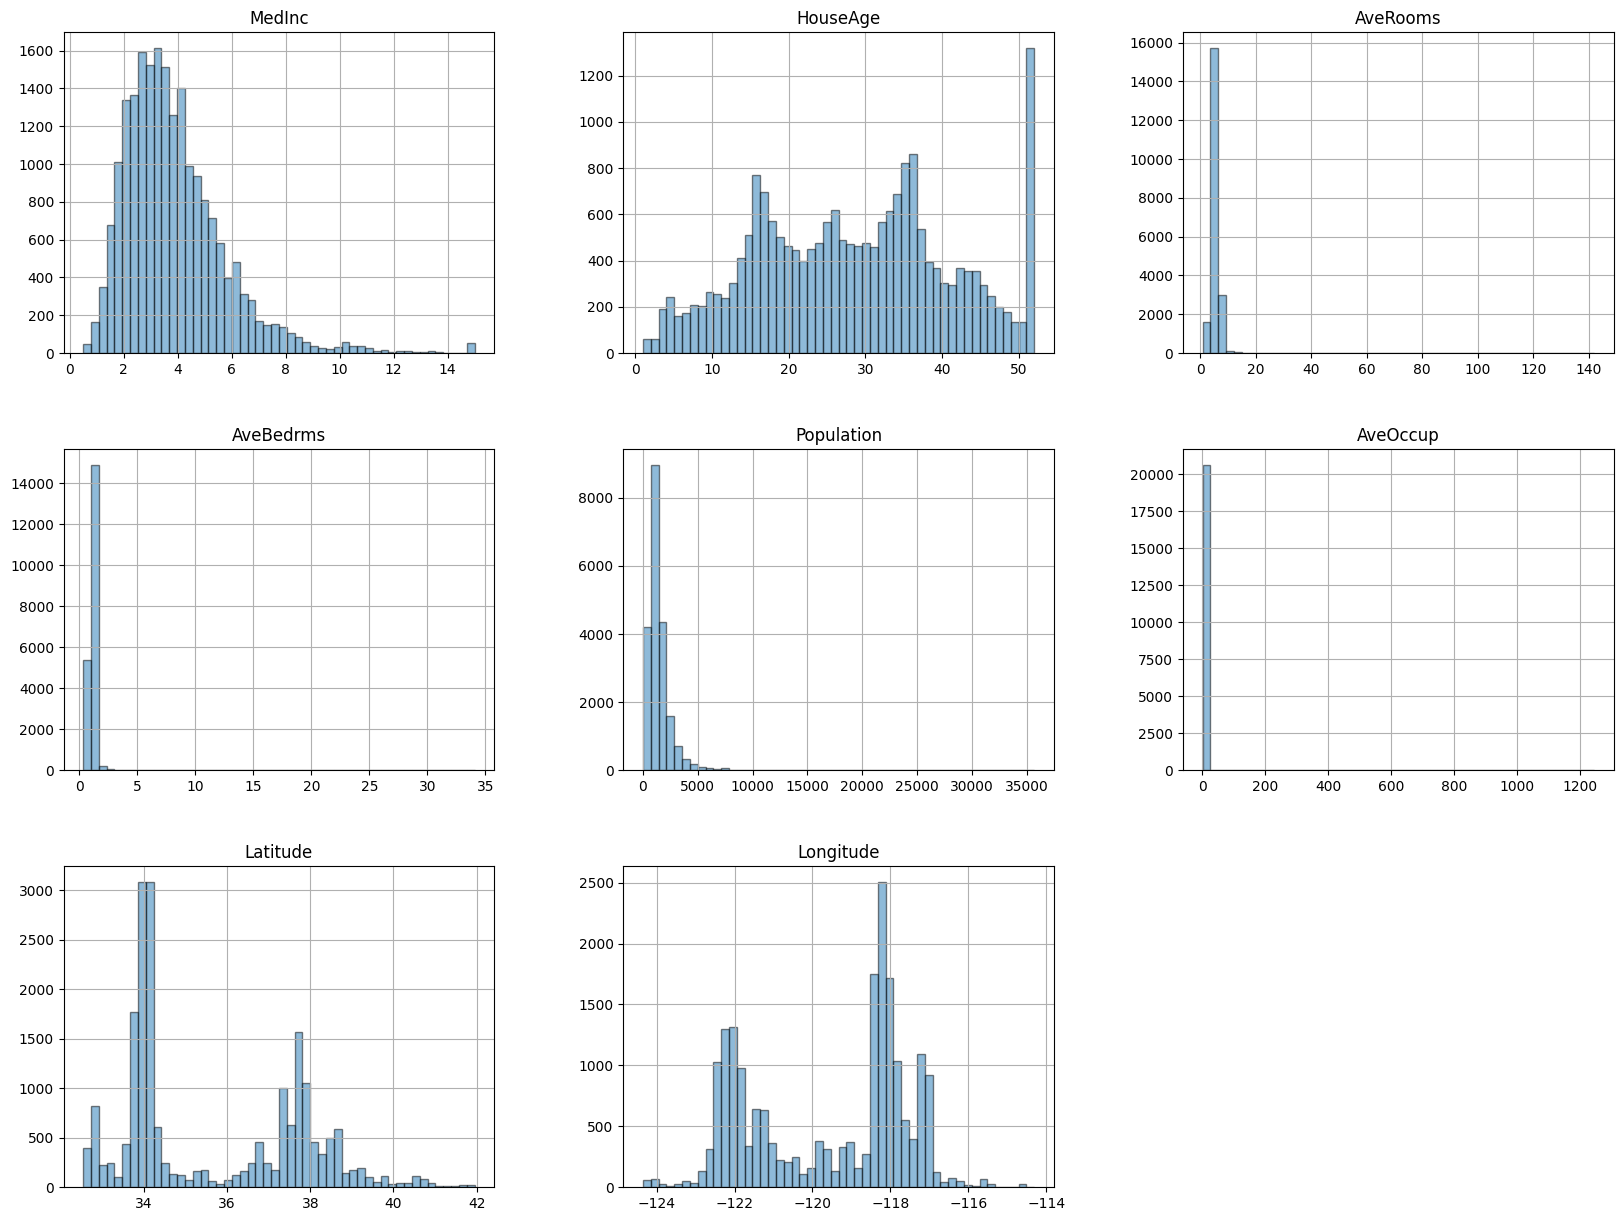

In [37]:
def plot_feature_distributions(df):
    df.hist(bins=50, figsize=(20, 15), edgecolor='k', alpha=0.5)
    plt.show()
    
plot_feature_distributions(df)

---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split
Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.

In [38]:
from sklearn.model_selection import train_test_split

(Xtr, Xte, ytr, yte) = train_test_split(df, targets, test_size=0.25, random_state=42)

### Exercise 3.2: Fit a LinearRegression
Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtr, ytr)

predictions = model.predict(Xte)

print(pd.DataFrame({
    'Predicted': predictions[:5],
    'Real': yte.iloc[:5].values
}))

   Predicted     Real
0   0.724128  0.47700
1   1.766778  0.45800
2   2.711516  5.00001
3   2.836012  2.18600
4   2.603755  2.78000


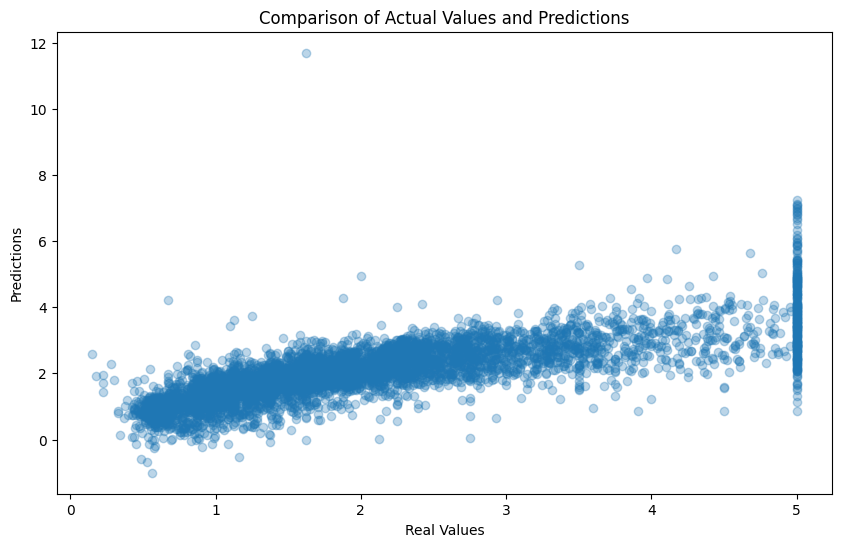

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(yte, predictions, alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Comparison of Actual Values and Predictions')
plt.show()

### Exercise 3.3: Evaluate your Model
Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAS) for you model predictions. Try it on both the **test** and **training** splits.

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_predictions = model.predict(Xtr)
y_test_predictions = model.predict(Xte)

# MAE
train_mae = mean_absolute_error(ytr, y_train_predictions)
test_mae = mean_absolute_error(yte, y_test_predictions)

# RMSE
train_rmse = np.sqrt(mean_squared_error(ytr, y_train_predictions))
test_rmse = np.sqrt(mean_squared_error(yte, y_test_predictions))

print("Training set:")
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Root Mean Squared Error (RMSE): {train_rmse}')

print("\nTest set:")
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Root Mean Squared Error (RMSE): {test_rmse}')

Training set:
Mean Absolute Error (MAE): 0.5295154304301849
Root Mean Squared Error (RMSE): 0.7214930466501481

Test set:
Mean Absolute Error (MAE): 0.5296964012919458
Root Mean Squared Error (RMSE): 0.7356145375446766


Le prestazioni sul set di addestramento sono diverse da quelle sul set di test perché partizionando i due insiemi, i dati del set di test possono avere maggiore variabilità rispetto a quelli del set di addestramento e viceversa. Modificando la proporzione tra set di addestramento e set di test, il modello apprende in modo diverso. Ad esempio, set di addestramento più grandi di solito permettono al modello di apprendere meglio, ma si rischia l'overfitting. Con set di test più piccoli abbiamo meno varianza tra i dati, il che può portare a una valutazione meno accurata delle prestazioni del modello.

### Exercise 3.4: Visualizing the Results
Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made? 

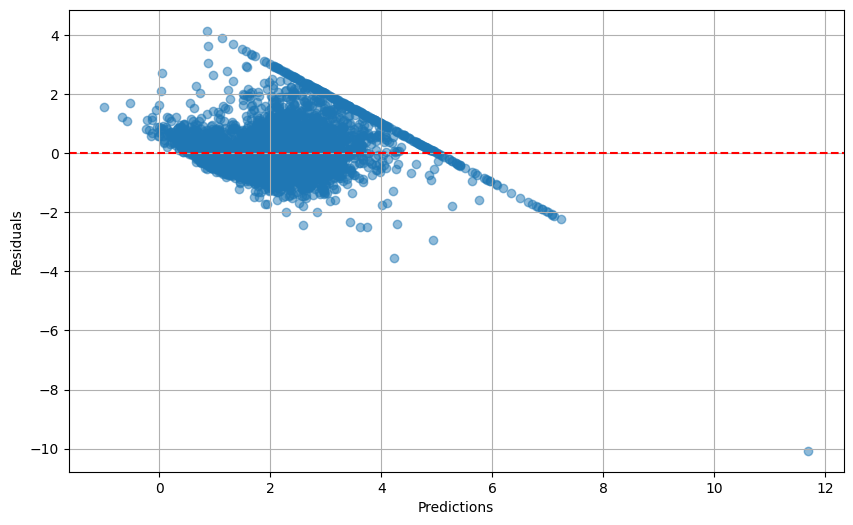

In [42]:
def plot_residuals(y_test, predictions, ax=None, title=''):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    residuals = y_test - predictions
    ax.scatter(predictions, residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predictions')
    ax.set_ylabel('Residuals')
    ax.grid(True)
    if title != '':
        ax.set_title(title)
    if ax is None:
        plt.show()
    
plot_residuals(yte, predictions)

Analizzando il grafico si nota che:
* i residui tendono a decrescere con l'aumento delle predizioni. Questo può significare che il modello non cattura bene la relazione tra le variabili indipendenti e la variabile dipendente.
* i residui dovrebbero essere distribuiti casualmente intorno alla linea orizzontale (tratteggiata in rosso) che rappresenta il valore zero dei residui, nel nostro caso questo non succede. Le predizioni quindi potrebbero essere inaccurate soprattutto per i valori predetti più alti o più bassi.
* è evidente la presenza di un outlier in basso a destra del grafico, con un valore predetto di circa 12 e un residuo di circa -10. Questo può influenzare l'analisi del modello. 

### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline
Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

In [43]:
def pipeline(model, df, targets, train_size=0.75, ax=None, title=''):
    
    X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size=train_size, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"Train size: {train_size}")
    print("\nTraining set:")
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'Root Mean Squared Error (RMSE): {train_rmse}')
    
    print("\nTest set:")
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'Root Mean Squared Error (RMSE): {test_rmse}')
    
    if ax:
        plot_residuals(y_test, y_test_pred, ax, title)

In [44]:
for train_size in [0.5, 0.6, 0.75, 0.9]:
    pipeline(model, df, targets, train_size)
    print(f'--------------------------------------------')

Train size: 0.5

Training set:
Mean Absolute Error (MAE): 0.5281781945051116
Root Mean Squared Error (RMSE): 0.7214130145740569

Test set:
Mean Absolute Error (MAE): 0.531997848211222
Root Mean Squared Error (RMSE): 0.7286276383085544
--------------------------------------------
Train size: 0.6

Training set:
Mean Absolute Error (MAE): 0.5259662319942923
Root Mean Squared Error (RMSE): 0.7173510038133623

Test set:
Mean Absolute Error (MAE): 0.5336864874527283
Root Mean Squared Error (RMSE): 0.7372886305901217
--------------------------------------------
Train size: 0.75

Training set:
Mean Absolute Error (MAE): 0.5295154304301849
Root Mean Squared Error (RMSE): 0.7214930466501481

Test set:
Mean Absolute Error (MAE): 0.5296964012919458
Root Mean Squared Error (RMSE): 0.7356145375446766
--------------------------------------------
Train size: 0.9

Training set:
Mean Absolute Error (MAE): 0.5294704652831069
Root Mean Squared Error (RMSE): 0.7214790538887388

Test set:
Mean Absolute Erro

Le metriche MAE e RMSE rimangono abbastanza simili tra i vari esperimenti. Anche i grafici dei residui tendono ad essere molto simili, tranne l'ultimo grafico con training set da 0.9 in cui non è più presente l'outlier in basso a destra.

---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

**Questions**: Are our independent variables *scaled* similarly? Does our model have *high variance* -- that is, if we fit it to a new training sample, does the result vary dramatically?

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.

In [45]:
from sklearn.preprocessing import PolynomialFeatures

def pipeline_polynomial_features(model, df, targets, train_size=0.75, degree=1,axs=None, idx=0):
    print(f"\nDegree: {degree}")
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df)
    title = f'Degree: {degree}, Train size: {train_size}'
    pipeline(model, X_poly, targets, train_size, ax=axs[idx], title=title)


Degree: 1
Train size: 0.5

Training set:
Mean Absolute Error (MAE): 0.5281781945050984
Root Mean Squared Error (RMSE): 0.7214130145740569

Test set:
Mean Absolute Error (MAE): 0.5319978482112087
Root Mean Squared Error (RMSE): 0.7286276383085546
-----------------------------------------------------

Degree: 2
Train size: 0.5

Training set:
Mean Absolute Error (MAE): 0.4626424755828603
Root Mean Squared Error (RMSE): 0.6486830072473223

Test set:
Mean Absolute Error (MAE): 0.4728656924831568
Root Mean Squared Error (RMSE): 0.7960094389000779
-----------------------------------------------------

Degree: 3
Train size: 0.5

Training set:
Mean Absolute Error (MAE): 0.41523023870624737
Root Mean Squared Error (RMSE): 0.5828530322806115

Test set:
Mean Absolute Error (MAE): 0.5363054005203761
Root Mean Squared Error (RMSE): 6.997563321694374
-----------------------------------------------------

Degree: 1
Train size: 0.6

Training set:
Mean Absolute Error (MAE): 0.5259662319942907
Root Mean

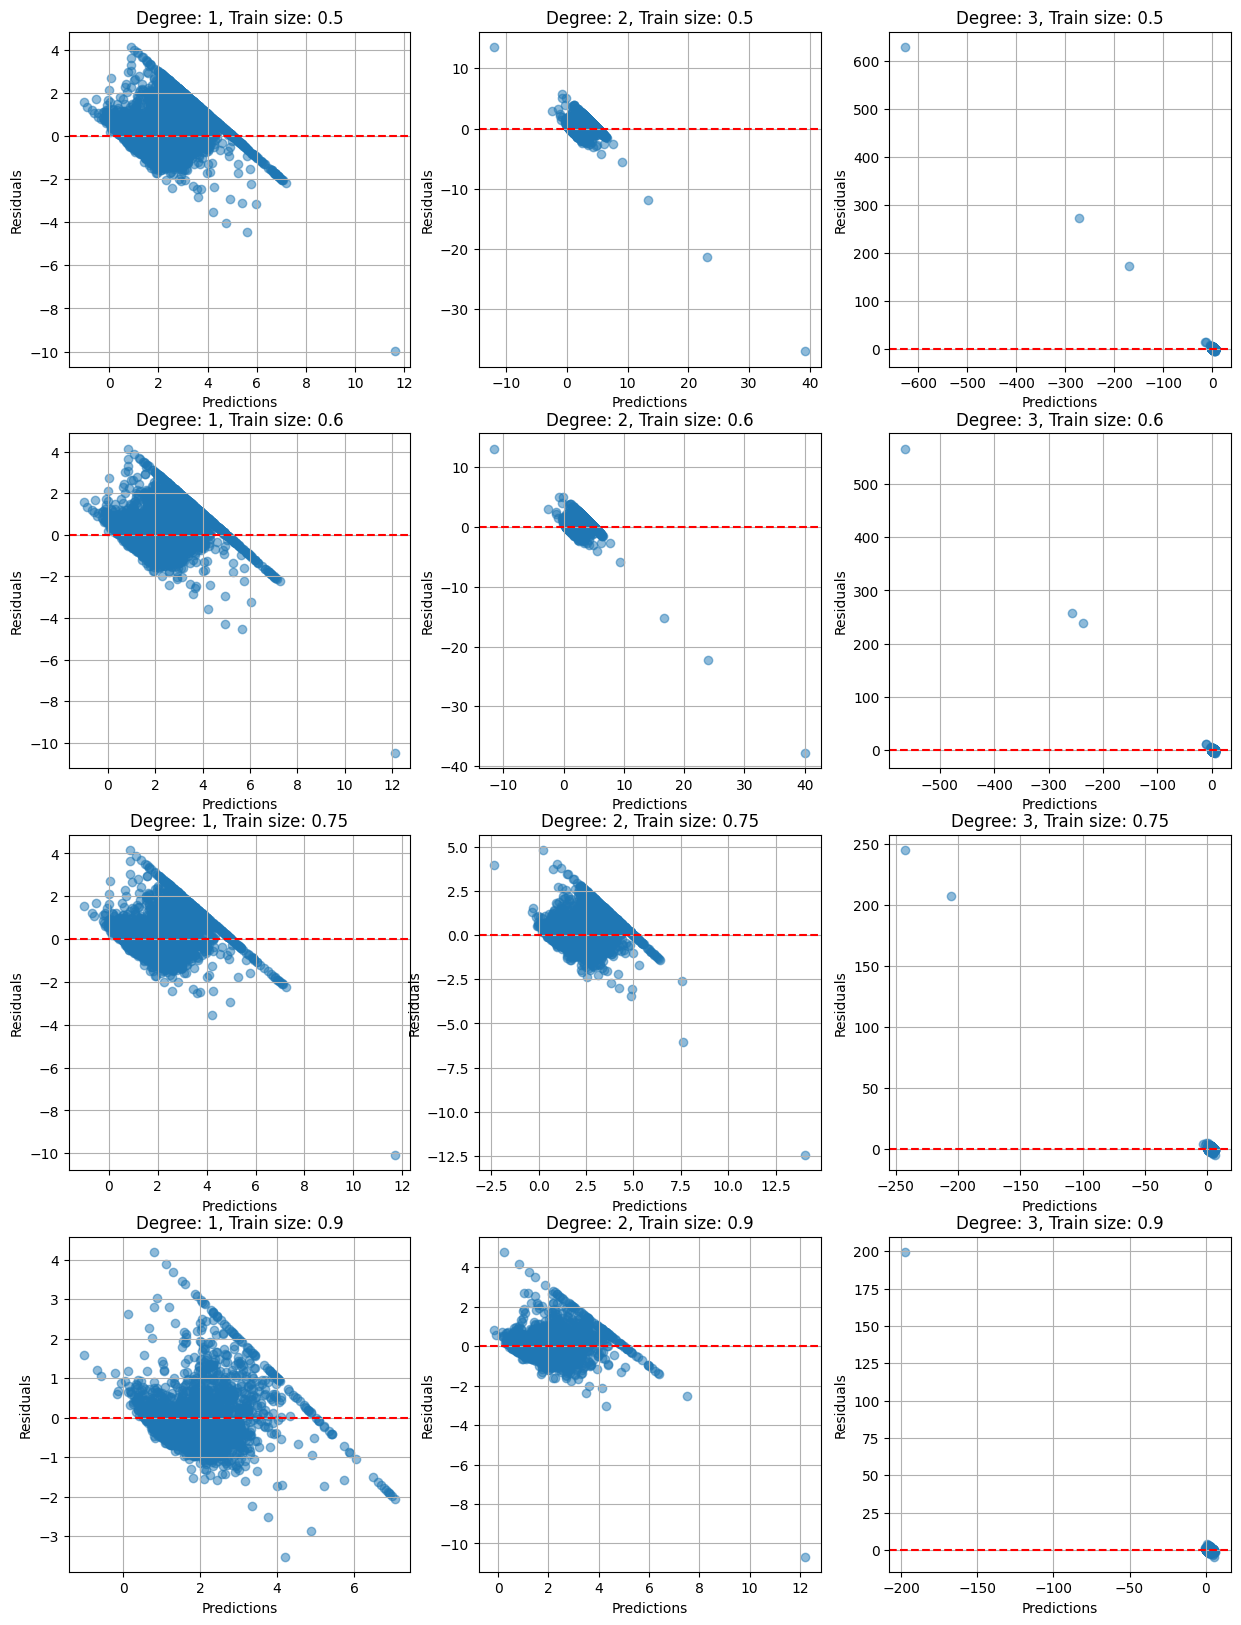

In [46]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
axs = axs.flatten()

idx = 0
for train_size, degree in [(ts, d) for ts in [0.5, 0.6, 0.75, 0.9] for d in [1, 2, 3]]:
    pipeline_polynomial_features(model, df, targets, degree=degree, train_size=train_size, axs=axs, idx=idx)
    idx += 1
    print(f"-----------------------------------------------------")

plt.show()

### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?



Train size: 0.5
Degree: 1, Mean CV MSE: 0.5254522331682808, Std CV MSE: 0.03143778278221394
Degree: 2, Mean CV MSE: 155.8316478756573, Std CV MSE: 309.1049927386758
Degree: 3, Mean CV MSE: 10912151.771382617, Std CV MSE: 21822621.48828657
Optimal Degree: 1
--------------------------------------------------------------------------

Degree: 1
Train size: 0.5

Training set:
Mean Absolute Error (MAE): 0.5281781945050984
Root Mean Squared Error (RMSE): 0.7214130145740569

Test set:
Mean Absolute Error (MAE): 0.5319978482112087
Root Mean Squared Error (RMSE): 0.7286276383085546

Degree: 2
Train size: 0.5

Training set:
Mean Absolute Error (MAE): 0.4626424755828603
Root Mean Squared Error (RMSE): 0.6486830072473223

Test set:
Mean Absolute Error (MAE): 0.4728656924831568
Root Mean Squared Error (RMSE): 0.7960094389000779

Degree: 3
Train size: 0.5

Training set:
Mean Absolute Error (MAE): 0.41523023870624737
Root Mean Squared Error (RMSE): 0.5828530322806115

Test set:
Mean Absolute Error (

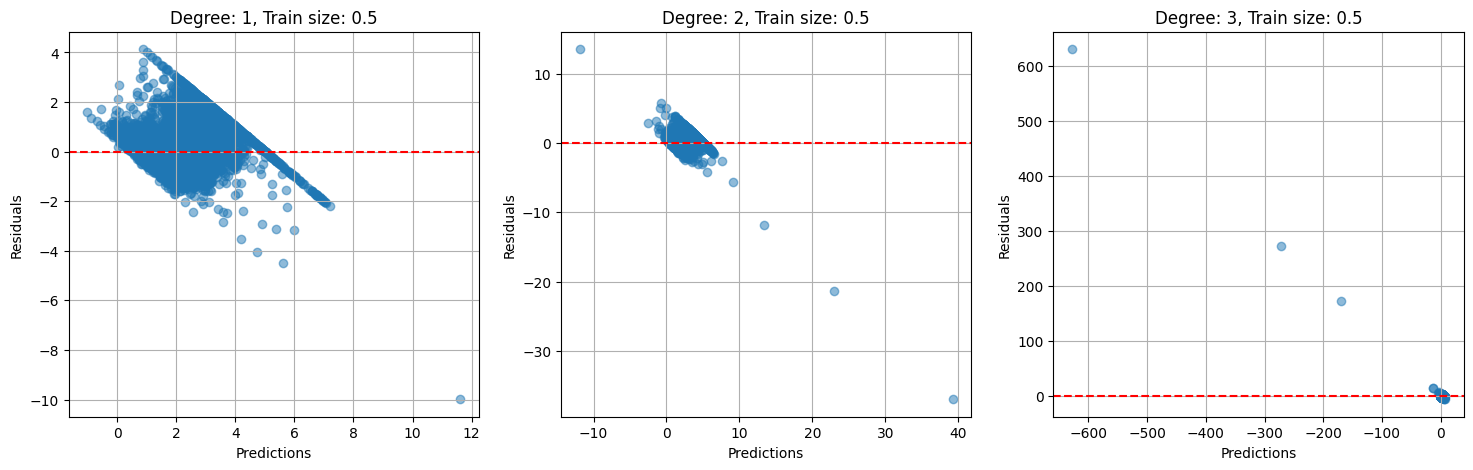



Train size: 0.6
Degree: 1, Mean CV MSE: 0.5184263002303556, Std CV MSE: 0.037121884954251345
Degree: 2, Mean CV MSE: 18.446183739168223, Std CV MSE: 29.337801895495858
Degree: 3, Mean CV MSE: 58592.39386915183, Std CV MSE: 70585.47966883173
Optimal Degree: 1
--------------------------------------------------------------------------

Degree: 1
Train size: 0.6

Training set:
Mean Absolute Error (MAE): 0.5259662319942907
Root Mean Squared Error (RMSE): 0.7173510038133623

Test set:
Mean Absolute Error (MAE): 0.5336864874527264
Root Mean Squared Error (RMSE): 0.7372886305901222

Degree: 2
Train size: 0.6

Training set:
Mean Absolute Error (MAE): 0.45913272685815454
Root Mean Squared Error (RMSE): 0.645040106628241

Test set:
Mean Absolute Error (MAE): 0.4786718023017627
Root Mean Squared Error (RMSE): 0.845725707261123

Degree: 3
Train size: 0.6

Training set:
Mean Absolute Error (MAE): 0.4125957987428779
Root Mean Squared Error (RMSE): 0.579572859484664

Test set:
Mean Absolute Error (M

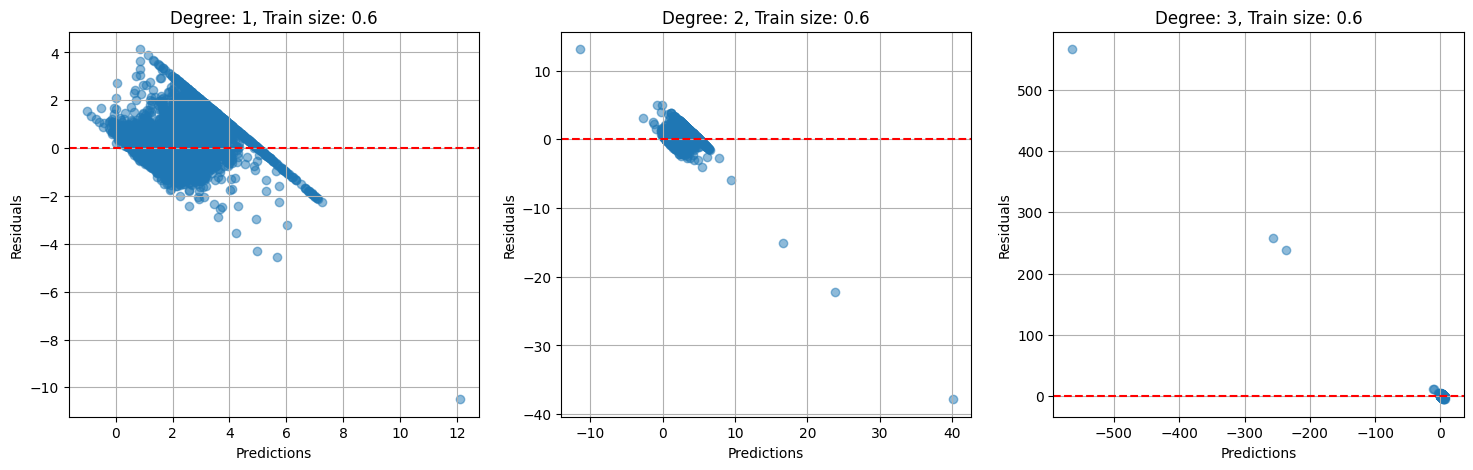



Train size: 0.75
Degree: 1, Mean CV MSE: 0.5242394295977025, Std CV MSE: 0.024482656689074938
Degree: 2, Mean CV MSE: 69.61617900278534, Std CV MSE: 136.925650042235
Degree: 3, Mean CV MSE: 321727.2438455926, Std CV MSE: 643427.2658078776
Optimal Degree: 1
--------------------------------------------------------------------------

Degree: 1
Train size: 0.75

Training set:
Mean Absolute Error (MAE): 0.529515430430212
Root Mean Squared Error (RMSE): 0.7214930466501482

Test set:
Mean Absolute Error (MAE): 0.5296964012919734
Root Mean Squared Error (RMSE): 0.7356145375446748

Degree: 2
Train size: 0.75

Training set:
Mean Absolute Error (MAE): 0.4619792885620173
Root Mean Squared Error (RMSE): 0.6504608570751244

Test set:
Mean Absolute Error (MAE): 0.46460207781165436
Root Mean Squared Error (RMSE): 0.6743806667085593

Degree: 3
Train size: 0.75

Training set:
Mean Absolute Error (MAE): 0.42039396990700767
Root Mean Squared Error (RMSE): 0.5904611672537736

Test set:
Mean Absolute Erro

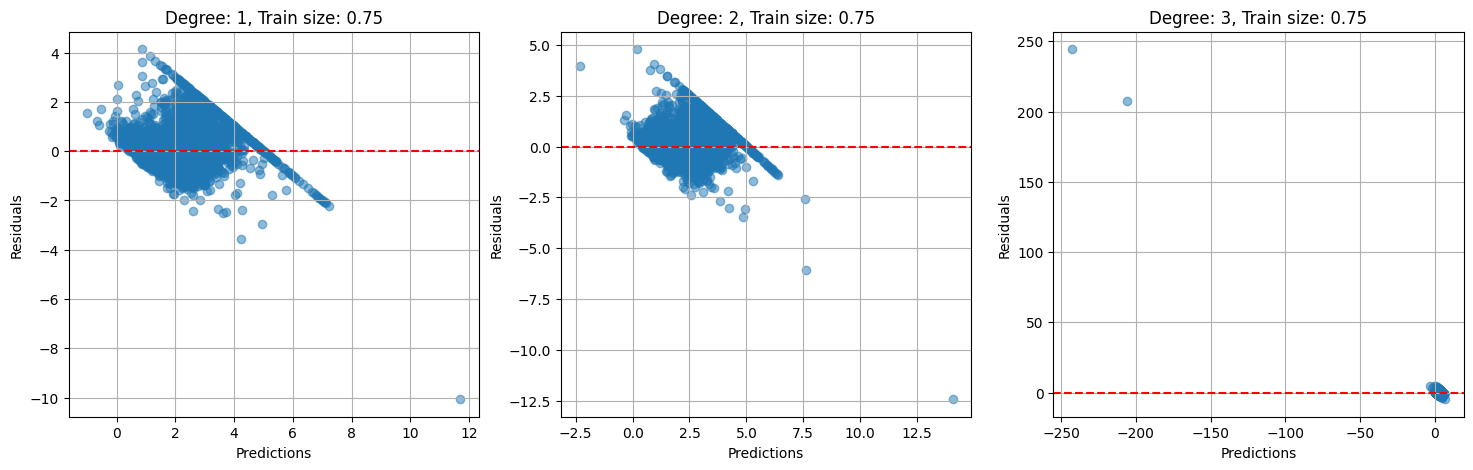



Train size: 0.9
Degree: 1, Mean CV MSE: 0.5245659411329034, Std CV MSE: 0.022722737285158938
Degree: 2, Mean CV MSE: 11.678919041001075, Std CV MSE: 22.027244254155157
Degree: 3, Mean CV MSE: 217629.1559473367, Std CV MSE: 432170.2815301087
Optimal Degree: 1
--------------------------------------------------------------------------

Degree: 1
Train size: 0.9

Training set:
Mean Absolute Error (MAE): 0.5294704652831186
Root Mean Squared Error (RMSE): 0.7214790538887389

Test set:
Mean Absolute Error (MAE): 0.5423972782283996
Root Mean Squared Error (RMSE): 0.7476643127116331

Degree: 2
Train size: 0.9

Training set:
Mean Absolute Error (MAE): 0.4601826337994146
Root Mean Squared Error (RMSE): 0.6476140018314095

Test set:
Mean Absolute Error (MAE): 0.4739559327013465
Root Mean Squared Error (RMSE): 0.700173220113503

Degree: 3
Train size: 0.9

Training set:
Mean Absolute Error (MAE): 0.41687914871521375
Root Mean Squared Error (RMSE): 0.5868195027034087

Test set:
Mean Absolute Error 

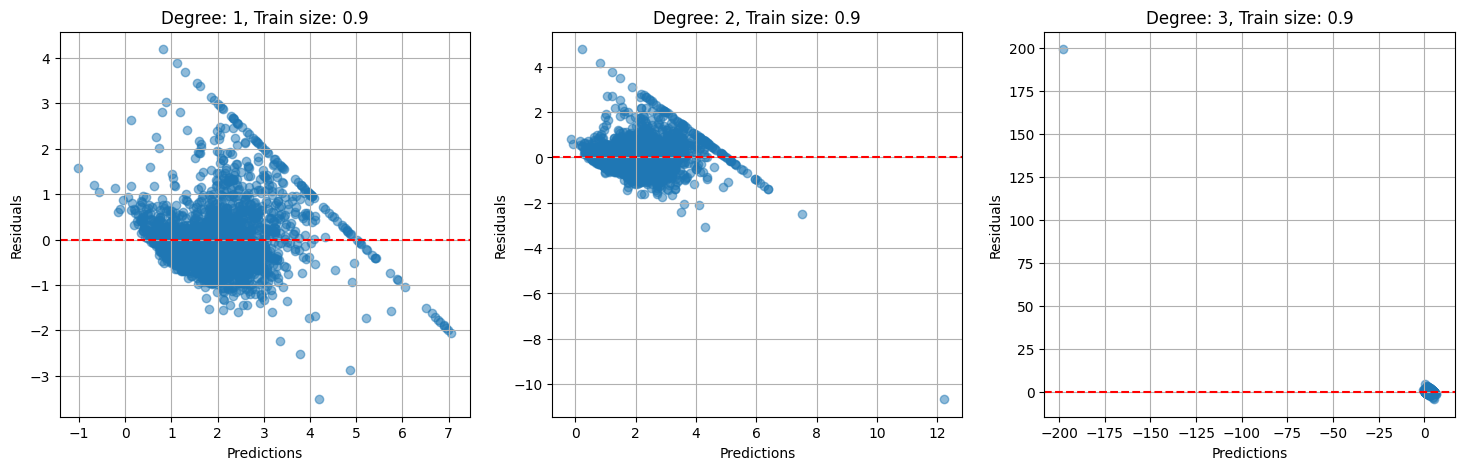

In [47]:
from sklearn.model_selection import cross_val_score

degrees = [1, 2, 3]

for train_size in [0.5, 0.6, 0.75, 0.9]:
    print(f'\n\nTrain size: {train_size}')
    cv_results = {}  # Reset cv_results for each train_size
    X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size=train_size, random_state=42)
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        scores = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = -np.mean(scores)
        std_score = np.std(scores)
        cv_results[degree] = (mean_score, std_score)
        print(f"Degree: {degree}, Mean CV MSE: {mean_score}, Std CV MSE: {std_score}")

    # Seleziona il grado ottimale considerando sia la media che la deviazione standard
    optimal_degree = min(cv_results, key=lambda k: (cv_results[k][0] + cv_results[k][1]))
    print(f"Optimal Degree: {optimal_degree}")
    print('--------------------------------------------------------------------------')
    
    # Esegui la pipeline con il grado ottimale
    fig, axs = plt.subplots(1, len(degrees), figsize=(18, 5))
    for idx, degree in enumerate(degrees):
        pipeline_polynomial_features(LinearRegression(), df, targets, train_size=train_size, degree=degree, axs=axs, idx=idx)
    plt.show()

Possiamo concludere che il grado polinomiale più basso (grado 1) tende a dare risultati migliori. I risultati della cross validation hanno mostrato che il grado polinomiale 1 (regressione lineare semplice) ha il Mean Squared Error (MSE) medio più basso e una deviazione standard minore. I gradi polinomiali più alti mostrano segni di overfitting, con valori di Mean Absolute Error (MAE) e Root Mean Squared Error (RMSE) più alti. Inoltre, i residui del modello di grado 1 sono distribuiti più casualmente intorno a zero, indicando un modello più bilanciato. Infine, le performance del modello sono risultate più stabili con una proporzione di training set del 75%. 